In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score
from sklearn.preprocessing import StandardScaler

# Gradiente Descendente

In [ ]:
class LinearRegression:
    def __init__(self, method='gradient_descent', learning_rate=0.01, max_iter=10000, epsilon=1e-6):
        """
        Classe para executar regressão linear multivariada.

        Parâmetros:
        - method: tipo de método para regressão(normal ou gradiente descendente).
        - learning_rate: taxa de aprendizado para o método de descida de gradiente.
        - max_iter: número máximo de iterações para descida de gradiente.
        - epsilon: limiar de convergência
        """
        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.betas = None
        self.loss_history = []

    def fit(self, X, y):
        # X é a matriz que representa os dados (m observações x n features)
        # Adiciona um termo de bias (coluna de 1's) a matriz de entrada
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'gradient_descent':
            self.betas = self._gradient_descent(X_b, y)
        elif self.method == 'normal':
            self.betas = self._normal(X_b, y)
        else:
            raise ValueError("Escolha 'gradient_descent' ou 'normal'")

    def _gradient_descent(self, X, y):
        m = len(y)
        # Iniciando radomicamente
        betas = np.random.randn(X.shape[1])
        self.loss_history = []

        for i in range(self.max_iter):
            # Previsões com os betas atuais
            y_pred = X @ betas
            # Cálculo do erro
            erro = y_pred - y
            # Cálculo da função de custo (MSE)
            loss = np.mean(erro ** 2)
            self.loss_history.append(loss)
            # Gradiente: cálculo vetorizado
            gradiente = (2/m) * (X.T @ erro)
            # Atualizando os parâmetros (betas)
            betas_new = betas - self.learning_rate * gradiente

            # Critérios de convergência
            if i > 0 and abs(self.loss_history[-2] - loss) < self.epsilon:
                print(f"Convergiu com base na loss {i}")
                break
            if np.all(np.abs(betas_new - betas) < self.epsilon):
                print(f"Convergiu com base nos betas {i}")
                break

            betas = betas_new

        return betas

    def _normal(self, X, y):
        # Evita problemas de UFuncTypeError
        X = X.astype(np.float64)
        y = y.astype(np.float64)
        # Equação normal
        return np.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de bias
        return X_b @ self.betas

    def plot_loss_history(self):
      plt.plot(range(len(self.loss_history)), self.loss_history, marker='o', linestyle='-')
      plt.title('Convergência por Épocas')
      plt.xlabel('Épocas')
      plt.ylabel('Função de Custo (MSE)')
      plt.grid(True)
      plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dados-mo444/df_encoded-5.csv')

In [ ]:
#colunas_zeradas = ['genero_Outro', 'genero_Prefiro não informar', 'cor_raca_Branca', 'cor_raca_Indígena', 'cor_raca_Outra', 'cor_raca_Prefiro não informar', 'pcd_Prefiro não informar', 'pcd_Sim', 'area_formacao_Ciências Sociais', 'area_formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI', 'situacao_trabalho_Prefiro não informar', 'situacao_trabalho_Servidor Público', 'setor_Entretenimento ou Esportes', "setor_Filantropia/ONG's", 'setor_Seguros ou Previdência', 'setor_Setor Alimentício', 'setor_Setor Automotivo', 'setor_Setor Farmaceutico', 'setor_Setor Imobiliário/ Construção Civil', 'setor_Setor Público', 'setor_Setor de Energia', 'setor_Varejo', 'regiao_Norte']
#df.drop(colunas_zeradas, axis=1, inplace=True)

In [ ]:
df.shape[1]

72

In [ ]:
df.shape[0]

3610

In [ ]:
df['salario'].mean()

9111.650138504156

In [ ]:
# TODO: Divisão de treinamento e validação
np.random.seed(42)
X = df.drop('salario', axis=1)
y = df['salario']
data = X.copy()
data['salario'] = y

# Embaralhamento
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# 80% de treino
train_size = int(0.8 * len(data))

# Dividir em treino e validação
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:]

# Separar novamente as features e o alvo  para treino e validação
X_train = train_data.drop('salario', axis=1)
y_train = train_data['salario']

X_val = val_data.drop('salario', axis=1)
y_val = val_data['salario']

# Mostrar os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} amostras")

Tamanho do conjunto de treino: 2888 amostras
Tamanho do conjunto de validação: 722 amostras


Normalização

In [ ]:
columns_to_normalize = X_train.select_dtypes(exclude=['bool']).columns
# Calcular média e desvio padrão das colunas selecionadas no conjunto de treino
mean = X_train[columns_to_normalize].mean(axis=0)
std = X_train[columns_to_normalize].std(axis=0)

# Normalizar as colunas selecionadas nos conjuntos de treino e validação
X_train[columns_to_normalize] = (X_train[columns_to_normalize] - mean) / std
X_val[columns_to_normalize] = (X_val[columns_to_normalize] - mean) / std


RMSE: 3528.195311365283
Mean Absolute Error (MAE): 2633.351132328374
R-squared (R2): 0.6062473936882666


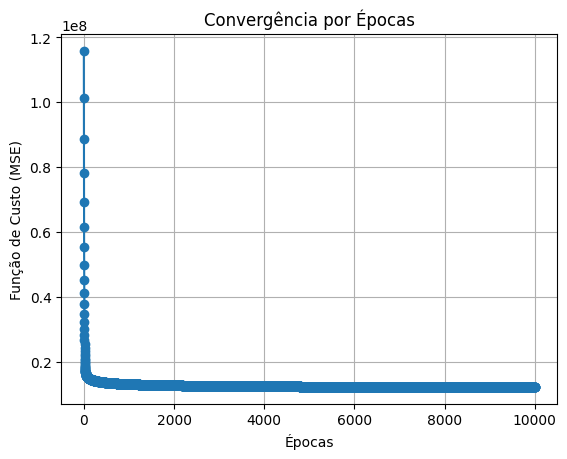

In [ ]:
model = LinearRegression(method='gradient_descent', learning_rate=0.01, max_iter=10000, epsilon=1e-6)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Métricas
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
if model.method == 'gradient_descent':
    model.plot_loss_history()

In [ ]:
model_sklearn = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=10000, tol=1e-6)
model_sklearn.fit(X_train, y_train)

# Fazer previsões
y_pred_sklearn = model_sklearn.predict(X_val)

# Calcular métricas
mse_sklearn = mean_squared_error(y_val, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
mae_sklearn = mean_absolute_error(y_val, y_pred_sklearn)
r2_sklearn = r2_score(y_val, y_pred_sklearn)

# Métricas
print(f"RMSE: {rmse_sklearn}")
print(f"Mean Absolute Error (MAE): {mae_sklearn}")
print(f"R-squared (R2): {r2_sklearn}")

RMSE: 3535.932250159214
Mean Absolute Error (MAE): 2659.2480791399294
R-squared (R2): 0.6045185891311479


In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_val, y_val))


0.6200342204879327
0.6065920893626099


In [ ]:
X_train['linguagem_mais_usada']

,linguagem_mais_usada
0,-0.102568
1,-0.102568
2,-0.102568
3,0.767344
4,-0.102568
...,...
2883,-0.102568
2884,-0.102568
2885,0.767344
2886,-0.102568


In [ ]:
# Filtrando os coeficientes que são zero
zero_coefs = pd.Series(lasso_cv.coef_, index=X_train.columns)
zero_features = zero_coefs[zero_coefs == 0].index.tolist()

# Exibindo as features que possuem coeficientes zero
print("Features com coeficientes zero (removidas pelo Lasso):")
print(zero_features)

Features com coeficientes zero (removidas pelo Lasso):
['genero_Outro', 'genero_Prefiro não informar', 'cor_raca_Branca', 'cor_raca_Indígena', 'cor_raca_Outra', 'cor_raca_Prefiro não informar', 'pcd_Prefiro não informar', 'pcd_Sim', 'area_formacao_Ciências Sociais', 'area_formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI', 'area_formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios', 'situacao_trabalho_Prefiro não informar', 'situacao_trabalho_Servidor Público', 'setor_Entretenimento ou Esportes', "setor_Filantropia/ONG's", 'setor_Seguros ou Previdência', 'setor_Setor Alimentício', 'setor_Setor Automotivo', 'setor_Setor Farmaceutico', 'setor_Setor Imobiliário/ Construção Civil', 'setor_Setor Público', 'setor_Setor de Energia', 'setor_Varejo', 'cargo_Desenvolvedor/Engenheiro de Software', 'cargo_Gerente de Produto', 'cargo_Outros']


In [ ]:
coeficientes = pd.Series(lasso_cv.coef_, index=X_train.columns)

# Filtrar apenas as colunas que possuem coeficientes diferentes de zero
important_features = coeficientes[coeficientes != 0]

# Ordenar por importância (valor absoluto dos coeficientes)
important_features = important_features.reindex(important_features.abs().sort_values(ascending=False).index)

# Exibir as features mais importantes
print("Features mais importantes com Lasso:")
print(important_features.tail(20))


Features mais importantes com Lasso:
cargo_Líder Técnico                                                -401.990334
regiao_Sul                                                         -363.378010
area_formacao_Outras Engenharias                                    363.045164
area_formacao_Marketing / Publicidade / Comunicação / Jornalismo   -355.082610
tempo_exp_ti                                                        316.732874
regiao_Sudeste                                                      289.785130
area_formacao_Outra opção                                          -284.117454
setor_Marketing                                                    -265.506692
cargo_Engenheiro/Especialista                                       256.998604
setor_Internet/Ecommerce                                            251.114476
setor_Área de Consultoria                                          -233.788255
setor_Educação                                                     -182.942937
area_formacao_Q

In [ ]:


# Assuming 'correlation_matrix' is your calculated correlation matrix DataFrame

def get_top_correlations(correlation_matrix, n=5):
    """
    Returns the top n correlations between different variables.

    Args:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        n (int): The number of top correlations to return. Defaults to 5.

    Returns:
        pd.DataFrame: A DataFrame containing the top correlations.
    """
    # Unstack the correlation matrix to get pairs of variables and their correlations
    unstacked_corr = correlation_matrix.unstack()

    # Filter out self-correlations (correlation of a variable with itself)
    filtered_corr = unstacked_corr[unstacked_corr.index.get_level_values(0) != unstacked_corr.index.get_level_values(1)]

    # Sort by absolute correlation value in descending order
    sorted_corr = filtered_corr.abs().sort_values(ascending=False)

    # Get the top n correlations
    top_corr = sorted_corr.head(n)

    # Reset index to make it readable
    top_corr = top_corr.reset_index()
    top_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

    return top_corr

# Get the top 10 correlations
top_correlations = get_top_correlations(correlation_matrix, n=10)

# Print the result
print(top_correlations)

                           Variable 1                          Variable 2  \
0                        cargo_Gestor                              gestor   
1                              gestor                        cargo_Gestor   
2                     cor_raca_Branca                      cor_raca_Parda   
3                      cor_raca_Parda                     cor_raca_Branca   
4                 setor_Setor Público  situacao_trabalho_Servidor Público   
5  situacao_trabalho_Servidor Público                 setor_Setor Público   
6                          regiao_Sul                      regiao_Sudeste   
7                      regiao_Sudeste                          regiao_Sul   
8                     tempo_exp_dados                  nivel_profissional   
9                  nivel_profissional                     tempo_exp_dados   

   Correlation  
0     0.834414  
1     0.834414  
2     0.756513  
3     0.756513  
4     0.641987  
5     0.641987  
6     0.608124  
7     0.608124  